In [49]:
import pandas as pd

In [45]:
# code to generate alteration table 
import generate_alteration_table
from generate_alteration_table import *

# code to generate CNA clustering plot and oncoprint plot
import oncoprint 
from oncoprint import *

In [3]:
# let's first generate the alteration table 
# read in the mutation data 
folder = "/Users/xuj8/Desktop/Projects/CRC_Tropism_msk_impact/data_MSKIMPACT_v4.19_080224/"
mutations_file = folder + 'data_mutations_extended_somatic.oncokb.txt' 
clinical_file = folder + 'data_clinical_sample_somatic.oncokb.txt' 
fusion_file = folder + 'data_sv.oncokb.txt'  
cna_file = folder + 'data_CNA.oncokb.txt'  

df_mutations = pd.read_csv(mutations_file, sep='\t')
df_clinical = pd.read_csv(clinical_file, sep='\t')    
df_fusion = pd.read_csv(fusion_file, sep='\t') 
df_cna = pd.read_csv(cna_file, sep='\t') 

In [10]:
# read in the FACETS arm_level file 
df_arm_level = pd.read_csv('/Users/xuj8/Downloads/FACETS_Data_2024_06_14-selected/impact_facets_annotated.arm_level.txt', sep='\t')
df_arm_level.dropna(subset=['lcn'], inplace=True) 
df_arm_level.drop_duplicates(subset=['sample', 'arm'], keep='first', inplace=True) 
# change the sample column, only keep the tumor sample id before '_' 
df_arm_level['sample'] = df_arm_level['sample'].apply(lambda x: x.split('_')[0]) 

In [12]:
genes = list(set(list(df_fusion['Site1_Hugo_Symbol'].unique()) + list(df_fusion['Site2_Hugo_Symbol'].unique()) + list(df_mutations['Hugo_Symbol'].unique()) + list(df_cna['HUGO_SYMBOL'].unique()))) 
samples = list(df_arm_level['sample'].unique())

df_mutation_table = generate_mutation_table(df_mutations, samples, oncogenic_only=True, genes=genes) 
df_fusion_table = generate_fusion_table(df_fusion, samples, oncogenic_only=True, genes=genes) 
df_cna_table = generate_cna_table(df_cna, samples, oncogenic_only=True, genes=genes) 

df_alteration_table = generate_alteration_table_with_details_oncoprint(df_mutation_table, df_fusion_table, df_cna_table, target_genes=genes)
df_results = transform_alterations_table(df_alteration_table)

# change event name to ones matching COLOR_MAP, Missense_Mutation to Missense Mutation (putative driver), etc. 
df_results['event'] = df_results['event'].replace({
    'Missense_Mutation': 'Missense Mutation (putative driver)', 
    'In_Frame_Del': 'Inframe Mutation (putative driver)',  
    'In_Frame_Ins': 'Inframe Mutation (putative driver)', 
    'Frame_Shift_Del': 'Truncating Mutation (putative driver)',
    'Frame_Shift_Ins': 'Truncating Mutation (putative driver)', 
    'Nonsense_Mutation': 'Truncating Mutation (putative driver)',
    'Translation_Start_Site': 'Truncating Mutation (putative driver)', 
    'Start_Codon_Del': 'Truncating Mutation (putative driver)', 
    'Start_Codon_Ins': 'Truncating Mutation (putative driver)',
    'Stop_Codon_Del': 'Truncating Mutation (putative driver)',
    'Stop_Codon_Ins': 'Truncating Mutation (putative driver)', 
    'Splice_Site': 'Splice Mutation (putative driver)', 
    'Splice_Region': 'Splice Mutation (putative driver)', 
    'Deletion': 'Deep Deletion',  
    'Amplification': 'Amplification', 
    'Structural Variant': 'Structural Variant (putative driver)',
    'Fusion': 'Fusion'}
)

In [14]:
# here i am subsetting tumors that pass FACETS_qc and has a primary_site of brain. You can input whatever tumor sample id that exist in cbioportal and have corresponding facets 
df_cohort_qc = pd.read_pickle('/Users/xuj8/Downloads/FACETS_Data_2024_06_14-selected/df_cohort_qc.112124.pkl') 
samples = df_cohort_qc[df_cohort_qc['primary_site'] == 'Brain']['tumor_sample'].tolist()

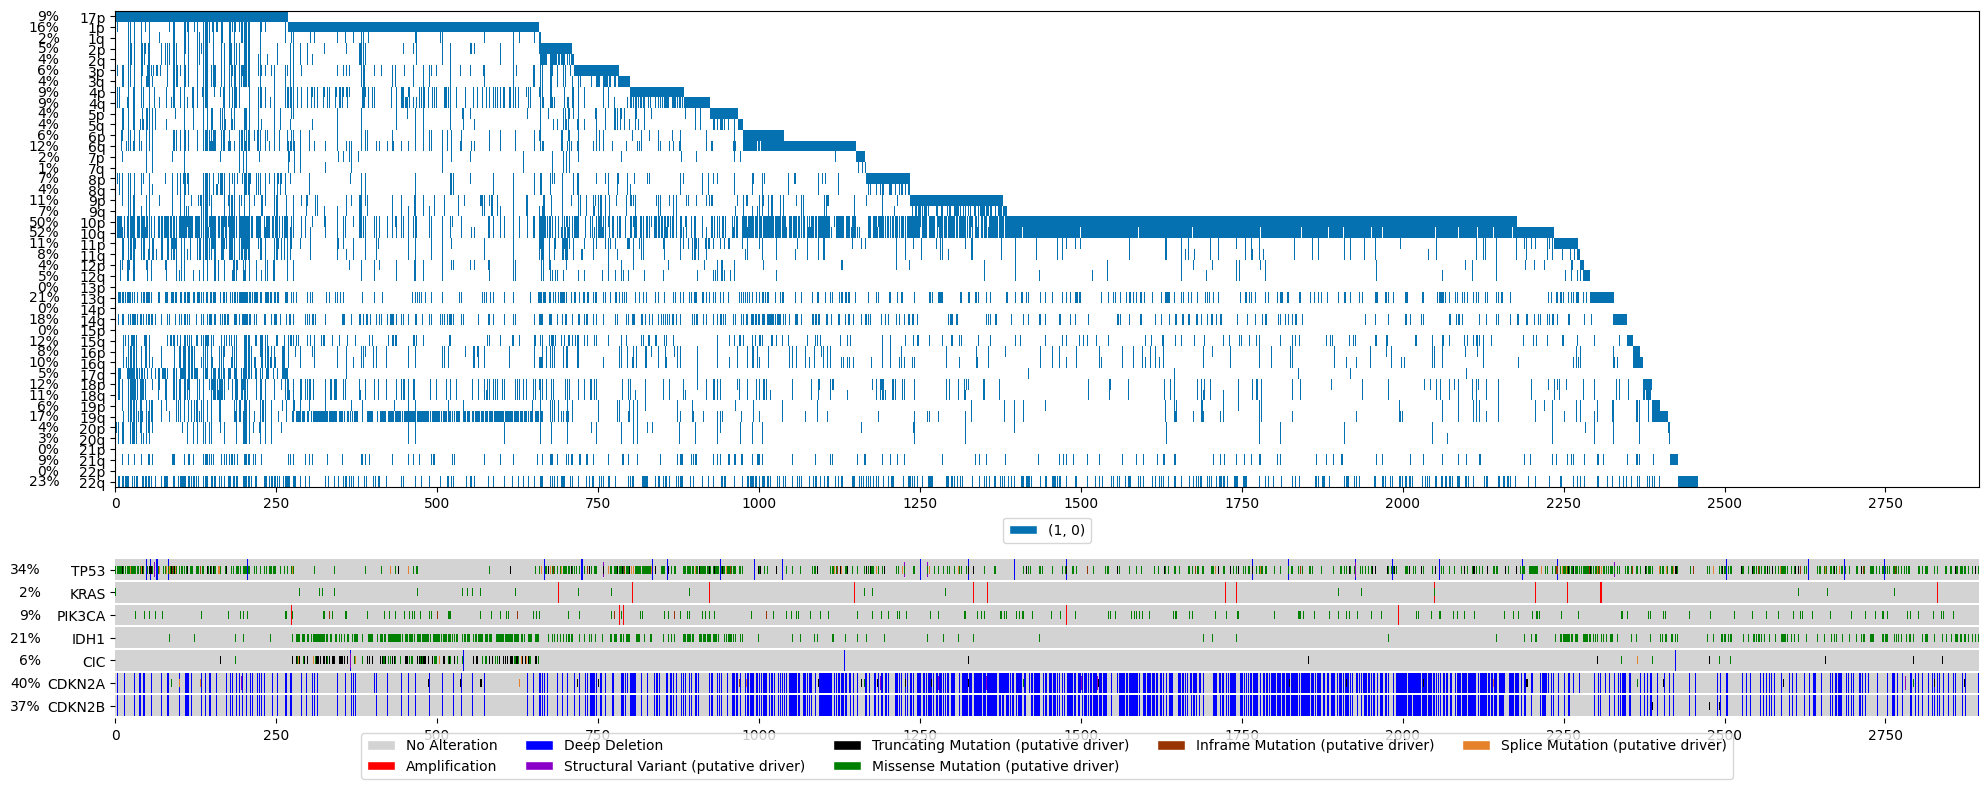

In [46]:
genes = ['TP53', 'KRAS', 'PIK3CA', 'IDH1', 'CIC', 'CDKN2A', 'CDKN2B']
tcn_lcn_targets = [(1,0)] 

plot_cna_and_oncoprint_combined(df_arm_level, df_results, samples, genes, tcn_lcn_targets, color_all_cn_states=False, use_order=None, add_line=None, sort_arm='17p') 

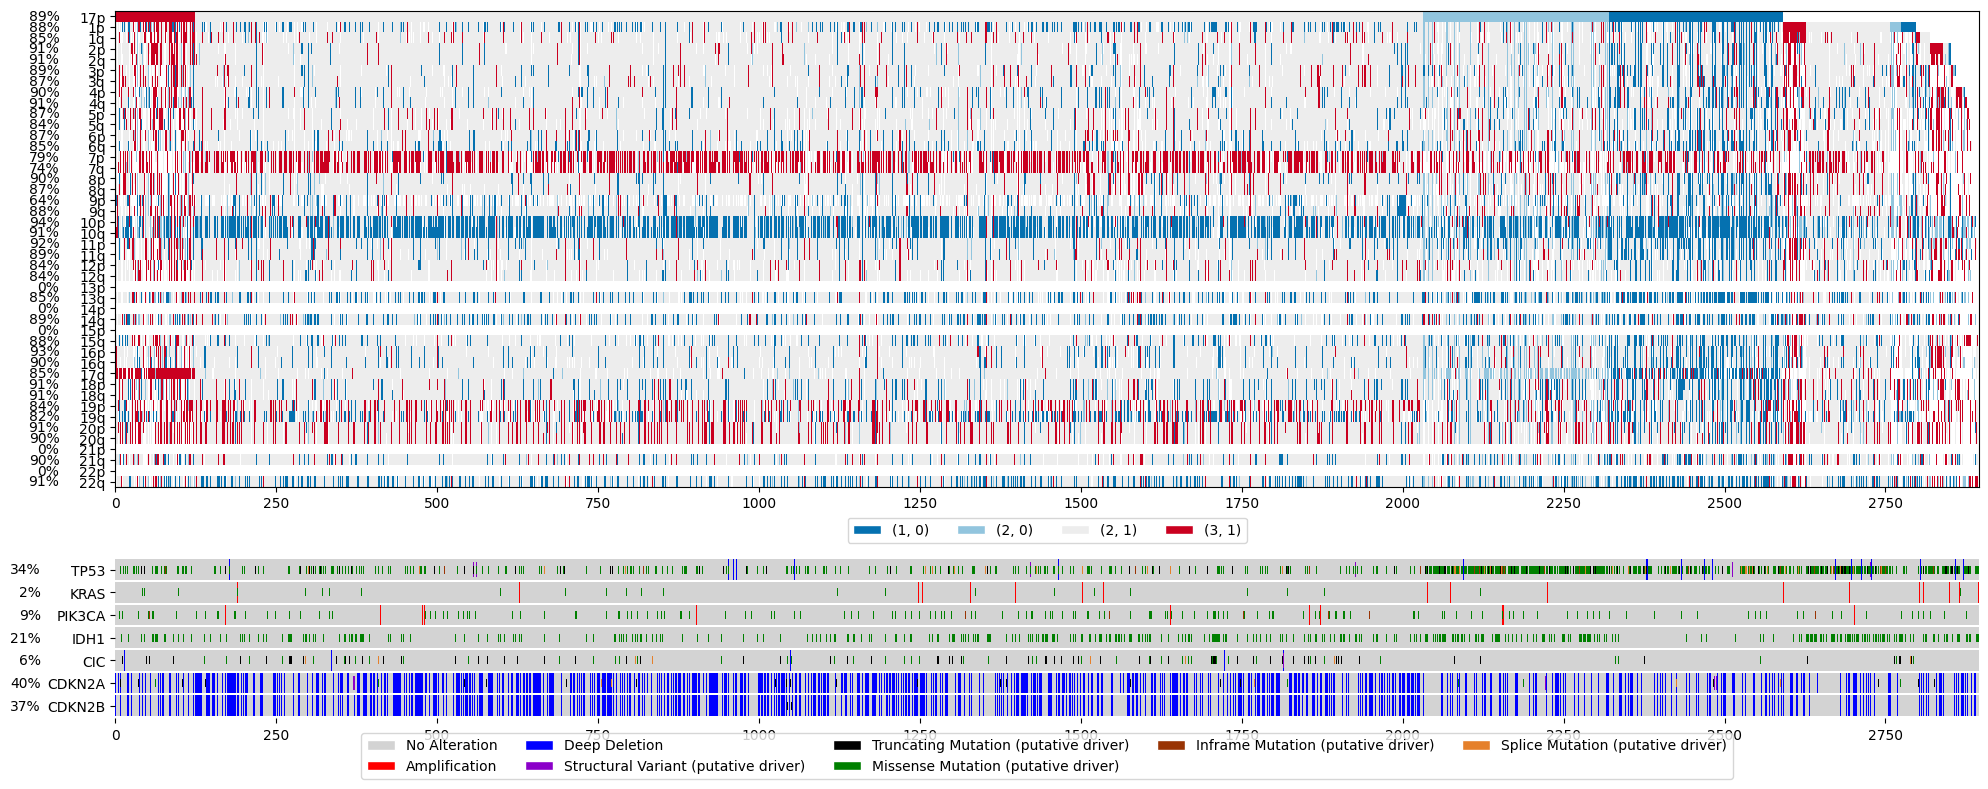

In [47]:
genes = ['TP53', 'KRAS', 'PIK3CA', 'IDH1', 'CIC', 'CDKN2A', 'CDKN2B']
tcn_lcn_targets = [(1,0), (2,0), (2,1), (3,1)] 

plot_cna_and_oncoprint_combined(df_arm_level, df_results, samples, genes, tcn_lcn_targets, color_all_cn_states=False, use_order=None, add_line=None, sort_arm='17p') 

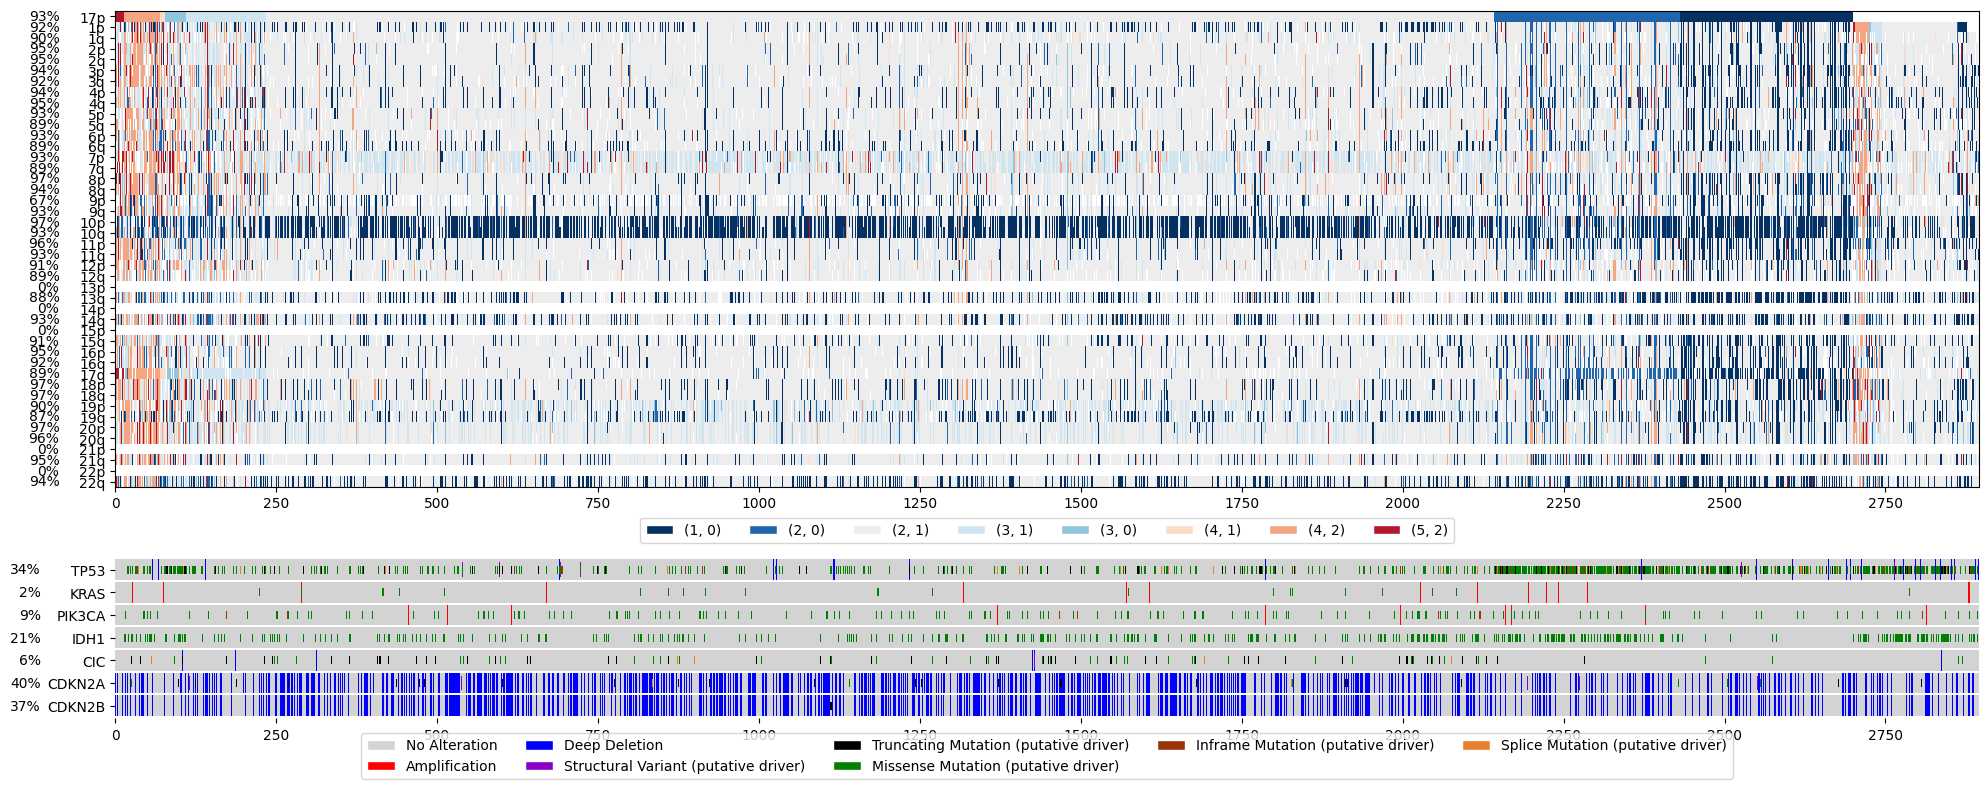

In [48]:
genes = ['TP53', 'KRAS', 'PIK3CA', 'IDH1', 'CIC', 'CDKN2A', 'CDKN2B']
tcn_lcn_targets = [(1,0), (2,0), (2,1), (3,1), (3,0), (4,1), (4,2), (5,2)]

plot_cna_and_oncoprint_combined(df_arm_level, df_results, samples, genes, tcn_lcn_targets, color_all_cn_states=True, use_order=None, add_line=None, sort_arm='17p') 